<a href="https://colab.research.google.com/github/SneburAzuos/Regress-o-Linear/blob/ipynb/C%C3%B3pia_de_housing_data_analise_regressao_linear_comentado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição de Machine Learning
O aprendizado de máquina é uma disciplina da inteligência artificial.

O objetivo principal é criar sistemas capazes de aprender automaticamente, ou seja, eles podem encontrar padrões complexos em grandes conjuntos de dados por conta própria.

# Tipos de algoritmos usados

Os algoritmos de aprendizado de máquina são geralmente classificados em dois grupos:
* **algoritmos supervisionados** que aplicam o que foi aprendido com dados históricos para tirar conclusões sobre novos dados.
* **não supervisionados** podem extrair inferências de conjuntos de dados. 

Embora existam outros tipos como, por exemplo, aprendizado semi-supervisionado e aprendizado por reforço, os dois tipos acima compreendem a maioria das aplicações e também nosso foco de estudo neste curso.

<img src='http://www.diegocalvo.es/wp-content/uploads/2018/09/machine-learning-classification.png' width='50%' />

# CRISP-DM methodology
<img src='https://www.kdnuggets.com/wp-content/uploads/crisp-dm-4-problems-fig1.png' width='40%' />

# California Housing - Regressão Linear

# Regressão Linear
Um dos modelos mais simples de aprendizado de máquina é a regressão linear. O modelo é utilizado quando existe uma relação linear entre os recursos (atributos) e a variável alvo, tudo o que precisamos encontrar é a equação da linha reta no espaço multidimensional.

A aplicação mais simples da Regressão Linear ocorre quando temos apenas 2 variáveis (x,y) em uma relação linear. Por exemplo, no vetor 'dados' apresentado abaixo, temos dados de vendas de imóveis: tamanho do imóvel e preço. Nosso objetivo é estimar o preço do imóvel a partir do seu tamanho. Se descobrimos que esse é um problema linear, tudo o que precisamos é encontrar o coeficiente m e a interceptação b da equação da reta que melhor se ajusta aos dados, ou seja:   **Preco = (m * Area) + b  ( equação da reta  Y = mX + b )**

Existem muitas maneiras de encontrar os coeficientes (m e b). Você pode utilizar o método dos **minímos quadrados** (MMQ) ou um dos métodos de otimização como gradiente descendente. Vamos utilizar o método dos **minímos quadrados** (MMQ):
# Método dos Mínimos Quadrados
<div><img src='http://astro.if.ufrgs.br/minq/min.gif' width='20%'>
<img src='https://devarea.com/wp-content/uploads/2019/03/Screen-Shot-2019-03-26-at-11.18.01.png' width='20%'></div>

## California House Alterado csv: encurtador.com.br/ckN38

# Sobre o conjunto de dados
# Contexto
Este é o conjunto de dados usado no segundo capítulo do livro recente de Aurélien Géron 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. Ele serve como uma excelente introdução à implementação de algoritmos de aprendizado de máquina porque requer limpeza de dados rudimentar, possui uma lista de variáveis facilmente compreensível e fica em um tamanho ideal entre ser muito fácil e muito complicado.

Os dados contêm informações do censo da Califórnia de 1990. Portanto, embora possa não ajudá-lo a prever os preços atuais de imóveis, como o conjunto de dados Zillow Zestimate, ele fornece um conjunto de dados introdutório acessível para ensinar as pessoas sobre os fundamentos do aprendizado de máquina.

Os dados pertencem às casas encontradas em um determinado distrito da Califórnia e algumas estatísticas resumidas sobre elas com base nos dados do censo de 1990. Esteja avisado de que os dados não são limpos, portanto, são necessárias algumas etapas de pré-processamento! As colunas são as seguintes, seus nomes são bastante auto-explicativos:

1. longitude: Uma medida de quão longe uma casa está a oeste; um valor mais alto está mais a oeste

2. latitude: Uma medida de quão ao norte uma casa está; um valor mais alto está mais ao norte

3. HabitaçãoMedianAge: Idade mediana de uma casa dentro de um quarteirão; um número mais baixo é um edifício mais novo

4. totalRooms: número total de quartos em um bloco

5. totalBedrooms: número total de quartos dentro de um quarteirão

6. população: número total de pessoas que residem dentro de um quarteirão

7. domicílios: número total de domicílios, um grupo de pessoas que residem dentro de uma unidade domiciliar, por um quarteirão

8. MedianIncome: Renda mediana para famílias dentro de um quarteirão de casas (medida em dezenas de milhares de dólares americanos)

9. medianHouseValue: valor médio da casa para famílias dentro de um quarteirão (medido em dólares americanos)

10. oceanProximity: Localização da casa w.r.t oceano/mar

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#0 importar bibliotecas pandas, numpy, io
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import io

In [7]:
#1 impotar o csv para um dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/housing_v1.csv", sep=',', na_values="?")

In [8]:
#2 verificar o número de linhas e colunas do dataframe
df.shape

(20648, 11)

In [9]:
#3 Utilizar o método info() para visualizar as informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20648 entries, 0 to 20647
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20648 non-null  int64  
 1   longitude           20645 non-null  float64
 2   latitude            20645 non-null  float64
 3   housing_median_age  20645 non-null  float64
 4   total_rooms         20645 non-null  float64
 5   total_bedrooms      20438 non-null  float64
 6   population          20645 non-null  float64
 7   households          20645 non-null  float64
 8   median_income       20645 non-null  float64
 9   median_house_value  20645 non-null  float64
 10  ocean_proximity     20645 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


In [10]:
#4 head()
df.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
#5 apagar a coluna id
df = df.drop(['id'],axis=1)

In [12]:
#6 visualizar os campos com valores faltantes
df.isna().sum()

longitude               3
latitude                3
housing_median_age      3
total_rooms             3
total_bedrooms        210
population              3
households              3
median_income           3
median_house_value      3
ocean_proximity         3
dtype: int64

In [13]:
#7 apagar linhas duplicadas
df = df.drop_duplicates()

In [14]:
#8 número de linhas e colunas
df.shape

(20641, 10)

In [15]:
#9 visualizar os campos com valores faltantes
df.isna().sum()

longitude               1
latitude                1
housing_median_age      1
total_rooms             1
total_bedrooms        208
population              1
households              1
median_income           1
median_house_value      1
ocean_proximity         1
dtype: int64

In [16]:
#10 apagar linhas com todos os campos em branco
df = df.dropna(how='all', axis=0)

In [17]:
#11 ver número de linhas e colunas
df.shape

(20640, 10)

In [18]:
#12 ver número de campos vazios nos atributos
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [19]:
#13 preencher os campos vazios da coluna 'total_bedrooms' com o valor médio
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

In [20]:
#14 contar o número de campos faltantes
df.isna().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [21]:
#15 head()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
#16 shape()
df.shape

(20640, 10)

In [23]:
#17 head
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [24]:
#18 como extrair uma amostra (sample) com n% do dataframe original
s = df.sample(frac=0.01)
s.shape

(206, 10)

In [25]:
#19 importar as bibliotecas matplotlib e seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

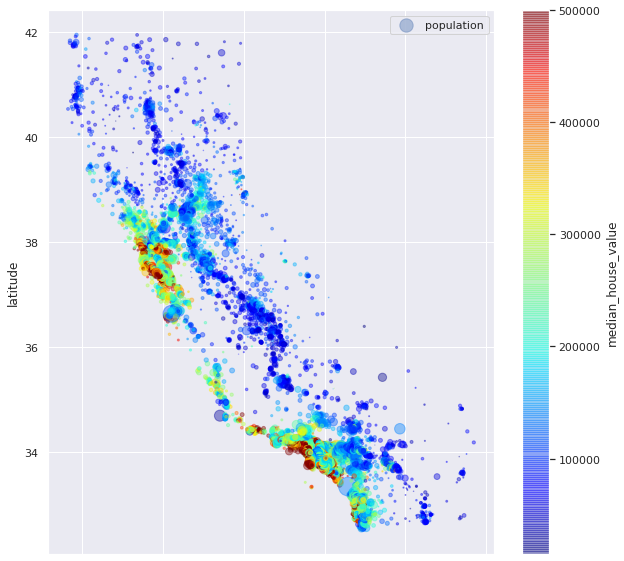

In [26]:
%matplotlib inline
df.plot(kind="scatter",
        x="longitude",
        y="latitude",
        alpha=0.4,
        s=df["population"]/100,
        label="population",
        figsize=(10,10), 
        c="median_house_value",
        cmap=plt.get_cmap("jet"),
        colorbar=True)
plt.show()

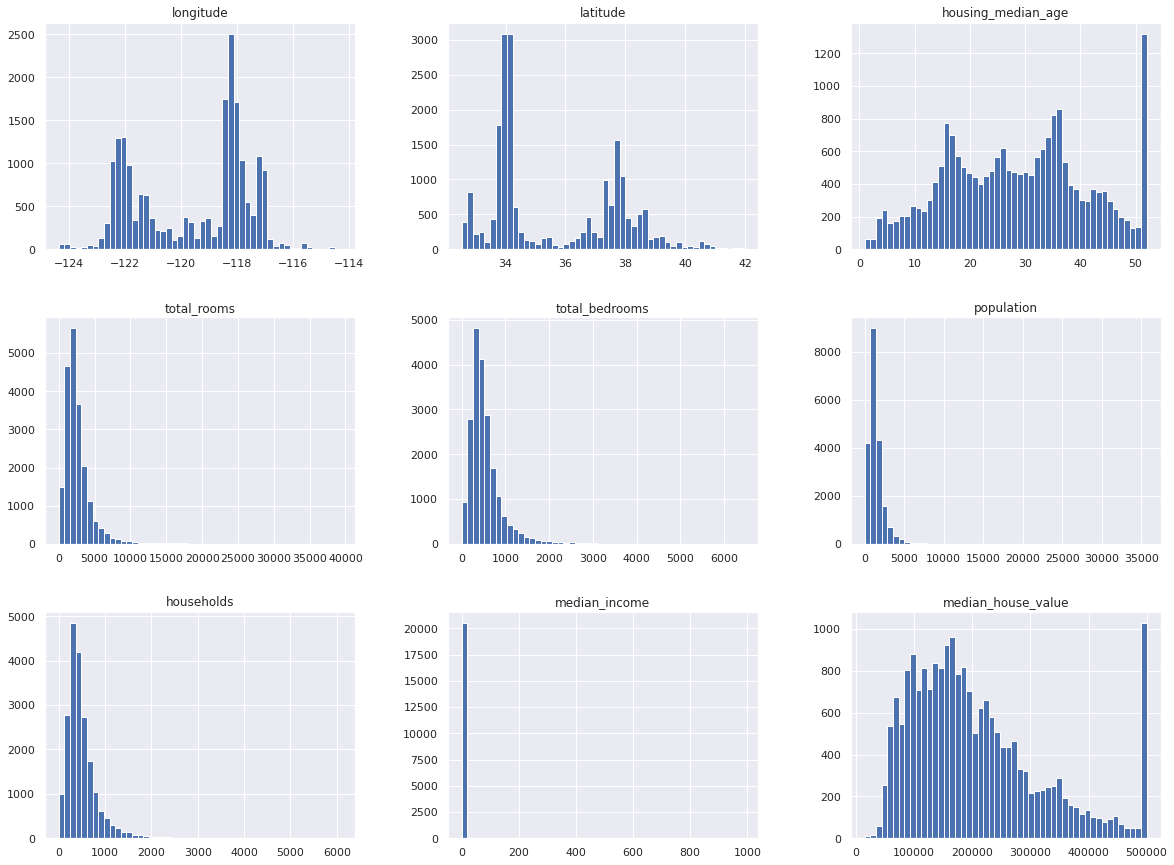

In [27]:
#20 construir um mini histograma de todos os atributos do dataframe
df.hist(bins=50, figsize=(20,15))
plt.show()

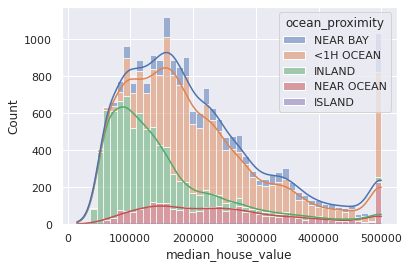

In [28]:
#21 construir o histograma do atributo 'median_house_value' utilizando a biblioteca Seaborn.
sns.histplot(data=df, x="median_house_value", kde=True,hue="ocean_proximity", multiple="stack")
plt.show()

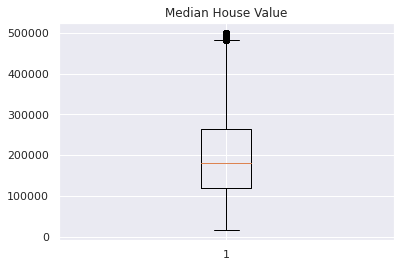

In [29]:
#22 construir um gráfico boxplot do atributo 'median_house_value'
plt.boxplot(df['median_house_value'])
plt.title('Median House Value')
plt.show()

Text(0.5, 1.0, 'Median House Value')

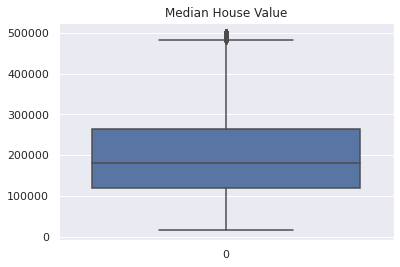

In [30]:
#23 construir um gráfico boxplot do atributo 'median_house_value' usando Seaborn
sns.boxplot(data=df['median_house_value'])
plt.title('Median House Value')

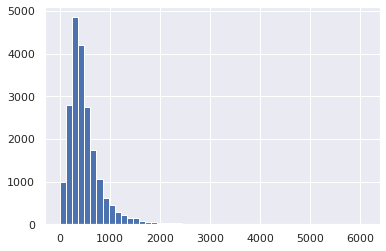

In [31]:
#24 construa um histograma do atributo 'households'
plt.hist(df['households'], bins=50)
plt.show()

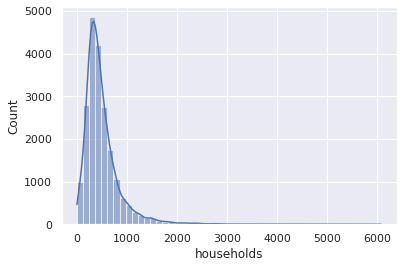

In [32]:
#25 construa um histograma do atributo 'households' com seaborn
sns.histplot(data=df['households'], bins=50, kde=True)
plt.show()

In [33]:
#26 Matriz de correlação 
corr = df.corr() # matriz de correlação
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.008003,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,0.001594,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,0.010905,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,-0.013137,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.030237,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,-0.030349,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,-0.032127,0.065843
median_income,-0.008003,0.001594,0.010905,-0.013137,-0.030237,-0.030349,-0.032127,1.000000,0.084127
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.084127,1.000000


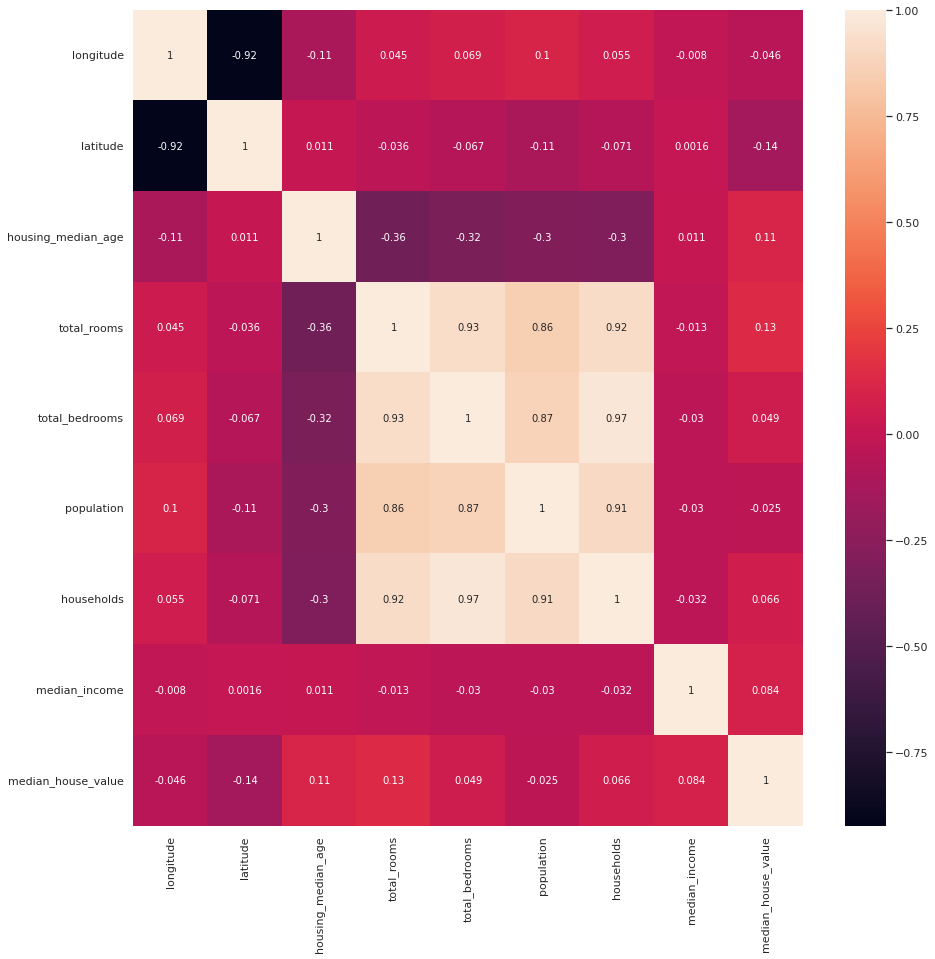

In [34]:
#27 Visualização da Matriz de Correlação em um Mapa de calor
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True) 
plt.show()

In [35]:
#Uma matriz de dispersão (pairs plot) plota compactamente todas as variáveis numéricas que temos em um conjunto de 
#dados umas contra as outras. Em Python, essa técnica de visualização de dados pode ser realizada com muitas bibliotecas, 
#mas se estivermos usando Pandas para carregar os dados, podemos usar o método base scatter_matrix para visualizar o conjunto de dados.
#pd.plotting.scatter_matrix(df)

In [36]:
#28 Vetor com o nome das colunas
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [37]:
#29 apagar as colunas 'longitude' e 'latitude'
df.drop(['longitude','latitude'], axis=1, inplace=True)

In [38]:
#30 Normalizar as escalas dos atributos do dataframe, retirar da normalização median_house_value e ocean_proximity 
from sklearn.preprocessing import Normalizer
escala = Normalizer()
df[['housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income']] = escala.fit_transform(
        df[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']])

In [39]:
#31 head()
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.042924,0.921301,0.135054,0.337112,0.131914,0.008716,452600.0,NEAR BAY
1,0.002741,0.926732,0.144382,0.313436,0.148559,0.001084,358500.0,NEAR BAY
2,0.033098,0.933753,0.120936,0.315707,0.112661,0.004619,352100.0,NEAR BAY
3,0.036404,0.891899,0.164518,0.390643,0.153317,0.003951,341300.0,NEAR BAY
4,0.029465,0.921912,0.158657,0.320148,0.146758,0.002179,342200.0,NEAR BAY


In [40]:
#32 transformar a coluna 'ocean_proximity' in variável categorica
df['ocean_proximity'] = df['ocean_proximity'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20646
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   housing_median_age  20640 non-null  float64 
 1   total_rooms         20640 non-null  float64 
 2   total_bedrooms      20640 non-null  float64 
 3   population          20640 non-null  float64 
 4   households          20640 non-null  float64 
 5   median_income       20640 non-null  float64 
 6   median_house_value  20640 non-null  float64 
 7   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(7)
memory usage: 1.8 MB


In [41]:
#33 Contar quantas vezes cada categoria aparece na coluna ocean_proximity
df['ocean_proximity'].value_counts()
df['ocean_proximity'].unique()

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [42]:
#d = dict(enumerate(df['ocean_proximity'].cat.categories))
#d.get(3)

In [43]:
#df['ocean_proximity'] = df['ocean_proximity'].cat.codes

In [44]:
#df.head()

In [ ]:
df.info()

In [45]:
#34 Codificar o atributo 'ocean_proximity' com get_dummies
df =  pd.get_dummies(df, prefix=['ocean_proximity'])

In [46]:
#35 head
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.042924,0.921301,0.135054,0.337112,0.131914,0.008716,452600.0,0,0,0,1,0
1,0.002741,0.926732,0.144382,0.313436,0.148559,0.001084,358500.0,0,0,0,1,0
2,0.033098,0.933753,0.120936,0.315707,0.112661,0.004619,352100.0,0,0,0,1,0
3,0.036404,0.891899,0.164518,0.390643,0.153317,0.003951,341300.0,0,0,0,1,0
4,0.029465,0.921912,0.158657,0.320148,0.146758,0.002179,342200.0,0,0,0,1,0


In [48]:
#36 Separar os atributos de entrada X e o atributo alvo de saída y
y = df['median_house_value']
X = df.drop(['median_house_value'], axis=1)

In [49]:
#37 Dividindo o dataframe em dados de treino (80%) e dados de teste (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
#38 Aplicando o Modelo de Regressão Linear

# 1. importar a biblioteca LinearRegression
from sklearn.linear_model import LinearRegression
# 2. Estanciar o objeto do modelo a ser usado
model = LinearRegression()
# 3. Ajustar os dados ao modelo (fit)
model.fit(X_train, y_train)
# 4. Testar o modelo com os dados de teste
y_pred = model.predict(X_test)

In [51]:
#39 Mostrar os coeficientes do ajuste:
b = model.intercept_
b

1117369.2360751054

In [54]:
a = model.coef_
a

array([-236865.5952676 , -495905.53996958, -856900.56841227,
       -753003.9183853 ,  321917.68333297, -473344.74696018,
          1173.37653376, -129759.77163261,  132515.7888948 ,
         -1656.2233493 ,   -2273.17044664])

# Medida de Avalição da precisão do problema de regressão.
[Metrics and scoring](https://scikit-learn.org/stable/modules/model_evaluation.html)

**R^2 (R ao quadrado): ** Também é conhecido como **coeficiente de determinação**. Essa métrica fornece uma indicação de quão bom um modelo se encaixa em um determinado conjunto de dados. Indica a proximidade da linha de regressão (ou seja, os valores previstos plotados) dos valores reais dos dados. O valor do quadrado R fica entre 0 e 1, em que 0 indica que este modelo não se ajusta aos dados fornecidos e 1 indica que o modelo se encaixa perfeitamente no conjunto de dados fornecido.

In [ ]:
# 40. compara a predição com o esperado
from sklearn import metrics 
#from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print('r2_score:', score)

# Cálculo da Acurácia

Se normalize == True, retorna a fração de amostras classificadas corretamente (float), senão retorna o número de amostras classificadas corretamente (int). O melhor desempenho é 1 com normalize == True e o número de amostras com normalize == False

In [ ]:
# from sklearn.metrics import r2_score
print("Acurácia - percentual de acerto: ", accuracy_score(y_test, y_pred))
print("Acurácia - Número de Amostras corretas: ", accuracy_score(y_test, y_pred, normalize=False))


# Medidas de Avalição da precisão do problema de regressão.

**MAE (Mean Absolute Error): Erro Médio Absoluto** - Não é muito sensível a valores discrepantes em comparação com o MSE, pois não pune erros enormes. Geralmente é usado quando o desempenho é medido em dados variáveis ​​contínuos. Ele fornece um valor linear, que calcula a média das diferenças individuais ponderadas igualmente. Quanto menor o valor, melhor é o desempenho do modelo.

**MSE (Mean Squared Error): Erro Quadrático Médio** - é uma das métricas mais comumente usadas, mas menos útil quando uma única previsão incorreta arruinaria as habilidades de previsão do modelo inteiro, ou seja, quando o conjunto de dados contém muito ruído. É mais útil quando o conjunto de dados contém valores discrepantes ou inesperados (valores muito altos ou muito baixos).

**RMSE (Root Mean Squared Error): Raiz do Erro Quadrático Médio** - No RMSE, os erros são elevados ao quadrado antes de serem calculados a média. Isso basicamente implica que o RMSE atribui um peso maior a erros maiores. Isso indica que o RMSE é muito mais útil quando erros grandes estão presentes e afetam drasticamente o desempenho do modelo. Evita tomar o valor absoluto do erro e essa característica é útil em muitos cálculos matemáticos.

In [57]:
#41 calculo das métricas MAE MSE RMSE
from sklearn import metrics  
print('MAE - Mean Absolute Error:',     metrics.mean_absolute_error(y_test, y_pred))  
print('MSE - Mean Squared Error:',      metrics.mean_squared_error(y_test, y_pred))  
print('RMSE - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  #mais usado

MAE - Mean Absolute Error: 62469.53720394943
MSE - Mean Squared Error: 7068624916.594169
RMSE - Root Mean Squared Error: 84075.11472840325
